# Chapter 12: Natural Language Processing (NLP)

12. 1 ***(Web Scraping with the Requests and Beautiful Soup Libraries)***  Web pages are excellent sources of text to use in NLP tasks. In the following IPython session, you'll use the
`requests library` to download the *www.python.org* home page's content. This is called
`web scraping`. You’ll then use the `Beautiful Soup library` to extract only the text from
the page. Eliminate the stop words in the resulting text, then use the *wordcloud* module
to create a word cloud based on the text.

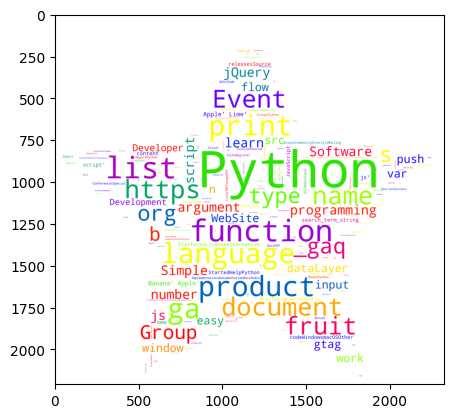

In [9]:
#Exercise 12.1

import requests
from bs4 import BeautifulSoup
import imageio
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Getting the page content #
response = requests.get('https://www.python.org')

response.content # give back the page's HTML

# Getting the text from the page #
soup = BeautifulSoup(response.content, 'html5lib')

text = soup.get_text(strip=True)  # text without tags

# Creating Wordcloud #
mask_image = imageio.v2.imread('Resources/mask_star.png')

wordcloud = WordCloud(colormap='prism', mask=mask_image,  background_color='white')

# wordcloud.generate first removes stop words from the text argument using
wordcloud = wordcloud.generate(text) # the wordcloud module's built-in stop-words list

wordcloud = wordcloud.to_file('scraping_python_page.png')

# Showing image #

# %matplotlib 
plt.imshow(wordcloud)

12. 2 ***(Tokenizing Text and Noun Phrases)*** Using the text from Exercise 12.1, create a TextBlob, then tokenize it into Sentences and Words, and extract its noun phrases.

In [18]:
#Exercise 12.2

import textblob
from nltk.corpus import stopwords
from re import fullmatch

stops = stopwords.words('english')

text = filter(
    lambda sent: fullmatch('\w+', sent) and sent.lower() not in stops, 
              text.split() 
              )

text = ' '.join(text)

blob = textblob.TextBlob(text)

print(blob.sentences)
print()
print(blob.words[:5])
print()
print(blob.noun_phrases[-5:])


[Sentence("function new _gaq _gaq var ga var JavaScript essential interaction content Please turn JavaScript full Python SiteGOAASmallerLargerResetSocializeFacebookTwitterChat IRCAboutApplicationsQuotesGetting StartedHelpPython BrochureDownloadsAll releasesSource codeWindowsmacOSOther PlatformsLicenseAlternative DocsPEP IndexPython BooksPython EssaysCommunityDiversityMailing ListsIRCForumsPSF Annual Impact ReportPython ConferencesSpecial Interest GroupsPython LogoPython WikiCode ConductCommunity AwardsGet InvolvedShared StoriesSuccess StoriesArtsBusinessEducationEngineeringGovernmentScientificSoftware DevelopmentNewsPython NewsPSF NewsletterPSF NewsPyCon US NewsNews CommunityEventsPython EventsUser Group EventsPython Events ArchiveUser Group Events ArchiveSubmit Interactive Python Fibonacci series def b 1 b 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987Functions DefinedThe core extensible programming defining Python allows mandatory optional keyword even arbitrary argument defining fun

12. 3 ***(Sentiment Analysis)*** Sentiment analysis is used to understand opinions expressed in product reviews. Using the techniques in Exercise 12.1, download and create a *Textblob* from a product review page. Calculate the average sentiment for the entire review.

12. 4 ***(Sentiment Analysis with the NaiveBayesAnalyzer)*** Repeat the previous exercise but use the NaiveBayesAnalyzer for sentiment analysis.

In [7]:
#Exercise 12.3 & 12.4

import textblob
import requests
from bs4 import BeautifulSoup
from re import fullmatch
from nltk.corpus import stopwords



response = requests.get(
    r'https://www.independent.co.uk/extras/indybest' \
                        + '/gadgets-tech/video-games-consoles' \
                        + '/psvr2-review-buy-uk-b2283463.html'
                        )

soup = BeautifulSoup(response.content, 'html5lib')

text = soup.get_text(strip=True)  

stops = stopwords.words('english')

text = filter(
    lambda sent: fullmatch(r'[A-Za-z\s]+',  sent) and sent.lower() not in stops, 
              text.split()
              )

text = ' '.join(text)

blob = textblob.TextBlob(
    text, 
    analyzer= textblob.sentiments.NaiveBayesAnalyzer()
    )

blob_2 = textblob.TextBlob( text)

%precision 3

print(f"Sentiment Analysis with Pattern Analyser (Default):\n\t" , blob_2.sentiment)
print(f"\nSentiment Analysis with Native Bayes Analyser:\n\t", blob.sentiment)

Sentiment Analysis with Pattern Analyser (Default):
	 Sentiment(polarity=0.1078634779854292, subjectivity=0.42731378377719803)

Sentiment Analysis with Native Bayes Analyser:
	 Sentiment(classification='pos', p_pos=1.0, p_neg=4.595432578449476e-19)


12. 5 ***(Spell Check a Project Gutenberg Book)*** Download a Project Gutenberg book and create a TextBlob. Tokenize the TextBlob into Words and determine whether any are misspelled. If so, display the possible corrections.

In [1]:
#exercise 12.5
from nltk.corpus import stopwords
from pathlib import Path
from textblob import TextBlob


blob = TextBlob(
    Path(
        'Resources/The Advancement of Learning by Francis Bacon.txt'
    ).read_text(
        encoding='UTF-8'
        )
)

stops = stopwords.words('english')

for word in blob.words:
    
    # If len(word.spellcheck()) == 1, the word is spelled correctly.  
    if len(word.spellcheck()) > 1:
        
        Possible_corrections = word.spellcheck()
        
        #If the word is not among the possible substitutions
        #and is not a stop word, then it is possible that it is misspelled. 
        condition = all(
            word not in spellcheck and word.lower() not in stops
            for spellcheck in Possible_corrections 
        )
        
        if condition:
            print(f"Possible misspelling: {word}")
            print("Possible corrections:", Possible_corrections)
            print()



Possible misspelling: Bookes
Possible corrections: [('Looked', 0.8076514346439958), ('Looks', 0.09351753453772582), ('Books', 0.06269925611052073), ('Jokes', 0.012752391073326248), ('Hooker', 0.006376195536663124), ('Cooked', 0.004250797024442083), ('Hooked', 0.003188097768331562), ('Cooks', 0.003188097768331562), ('Smokes', 0.0021253985122210413), ('Oozes', 0.0010626992561105207), ('Hooks', 0.0010626992561105207), ('Cookers', 0.0010626992561105207), ('Booked', 0.0010626992561105207)]

Possible misspelling: Henrie
Possible corrections: [('Erie', 0.875), ('Henri', 0.0625), ('Eerie', 0.0625)]

Possible misspelling: Tomes
Possible corrections: [('Comes', 0.7109375), ('Homes', 0.2734375), ('Domes', 0.015625)]

Possible misspelling: sould
Possible corrections: [('would', 0.36113165680473375), ('could', 0.3143491124260355), ('should', 0.23982988165680474), ('sound', 0.04049556213017751), ('soul', 0.03106508875739645), ('sold', 0.009060650887573964), ('souls', 0.003143491124260355), ('mould',

12.6 ***(Word Frequency Bar Chart)*** Word frequency analysis can provide an indication of the quality of a written text. Use the techniques you learned in this chapter to create a bar chart of the 20 most frequent words in a text.

,Word,Count
1,men,305
2,nature,274
3,hath,253
4,knowledge,249
5,may,239
6,upon,232
7,one,223
8,learning,192
9,things,182
10,yet,180


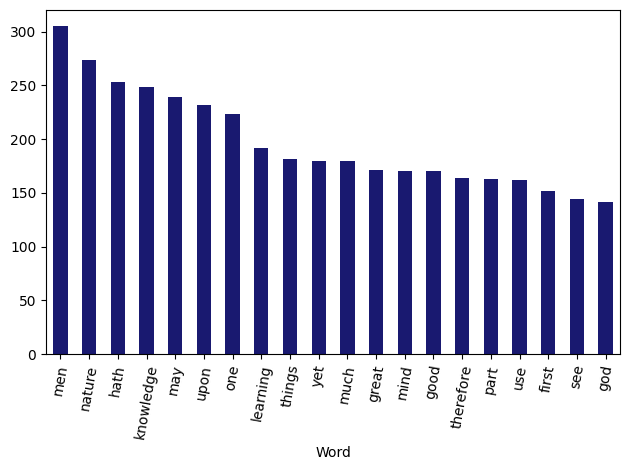

In [3]:
#Exercise 12.6
from pathlib import Path
from textblob import TextBlob
from nltk.corpus import stopwords
from pandas import DataFrame
import matplotlib.pyplot as plt

blob = TextBlob(
    Path(
        'Resources/The Advancement of Learning by Francis Bacon.txt'
    ).read_text(
        encoding='UTF-8'
        )
)

stops = stopwords.words('english')

words = [
    words for words in blob.word_counts.items()
        if words[0].isalpha() and words[0] not in stops
    ]

words.sort(key=lambda x: x[1], reverse=True)

top20 = DataFrame(
    data=words[1:21], 
    columns=['Word', 'Count'], 
    index=range(1, 21)
    )

top20.plot.bar(
    x='Word', 
    y='Count',
    legend=False,
    rot=80,
    color='midnightblue'
    )

plt.gcf().tight_layout()

top20.style.background_gradient(cmap="Blues")


12. 7 ***(Textatistic: Readability of Text)*** The quality of a text can be further
assessed by calculating readability parameters. From the text in Exercise 12.6,
calculate the average number of words per sentence, the average number of characters per
word and the average number of syllables per word.

In [5]:
#Exercise 12.7
from pathlib import Path
from textatistic import Textatistic
from textblob import TextBlob

text = Path(
        'Resources/The Advancement of Learning by Francis Bacon.txt'
    ).read_text(
            encoding='UTF-8'
            )

blob = TextBlob(text)
textatistic = Textatistic(text)

readability = {
    'avg_word' : textatistic.word_count / textatistic.sent_count,    
    'avg_char' : textatistic.char_count / textatistic.word_count,    
    'avg_sybl' : textatistic.sybl_count / textatistic.word_count    
    }

print(f"Average word per sentence: {readability['avg_word']:.3f}")
print(f"Average characters per word: {readability['avg_char']:.3f}")
print(f"Average syllables per word: {readability['avg_sybl']:.3f}")

Average word per sentence: 43.420
Average characters per word: 4.773
Average syllables per word: 1.379


12. 8 ***(spaCy: Find Product Names)*** The success of a product launch can be assessed by
counting the number of times the product is mentioned online. Use the spaCy library's
named entity recognition capabilities to look for a specific product name on a news website.

In [2]:
#Exercise 12.8

import spacy
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.theguardian.com/games')

# Getting the text from the page #
soup = BeautifulSoup(response.content, 'html5lib')

text = soup.get_text(strip=True)  # text without tags

nlp = spacy.load('en_core_web_sm')

text = nlp(text)

key: str = 'PlayStation'

number_of_mentions = int()

for entity in text.ents:
    
    if entity.text == key and entity.label_ == "PRODUCT":
        number_of_mentions += 1

print("Product:", key)
print("Number of mentions in The Guardian-Games:", number_of_mentions)

Product: PlayStation
Number of mentions in The Guardian-Games: 1


12. 9 ***(spaCy: Similarity Detection)*** Using the techniques in the first exercise, download
several news articles on the same topic and compare them for similarity.

In [12]:
#Exercise 12.9

import spacy

def get_text(url: str) -> str:
    '''It takes a URL, and returns the text of the page
    
    Parameters
    ----------
    url : str
        the url of the page you want to scrape
    
    Returns
    -------
        The text from the page
    
    '''
    import requests
    from bs4 import BeautifulSoup
    
    response = requests.get(url)
    response.content
    # Getting the text from the page #
    soup = BeautifulSoup(response.content, 'html5lib')

    text = soup.get_text(strip=True)  # text without tags
    
    return text


url_article1 = 'https://www.insight.com/en_US/content-and-resources/' \
                    'tech-journal/spring-2021/the-value-of-computer-vision--more-than-meets-the-eye.html'

url_article2 = 'https://xd.adobe.com/ideas/principles/emerging-technology/' \
                    'what-is-computer-vision-how-does-it-work/'

url_article3 = 'https://www.simplilearn.com/computer-vision-article'

nlp = spacy.load('en_core_web_lg')

article1 = nlp(get_text(url= url_article1))
article2 = nlp(get_text(url= url_article2))
article3 = nlp(get_text(url= url_article3))

print("Score value:\n\t 0.0 (not similar)\n\t 1.0 (identical)".expandtabs(11))
print()

print("Similarity of Article 1 with Article 2")
print(article1.similarity(article2)); print()

print("Similarity of Article 1 with Article 3")
print(article1.similarity(article3)); print()

print("Similarity of Article 2 with Article 3")
print(article2.similarity(article3))


Score value:
            0.0 (not similar)
            1.0 (identical)

Similarity of Article 1 with Article 2
0.8506301841753388

Similarity of Article 1 with Article 3
0.7783960406024221

Similarity of Article 2 with Article 3
0.880377910770621


12. 10 ***(spaCy: Shakespeare Similarity Detection)*** Using the spaCy techniques you
learned in this chapter, download a Shakespeare comedy from Project Gutenberg and
compare it for similarity with Romeo and Juliet.

In [2]:
#Exercise 12.10

from pathlib import Path
import spacy

nlp : spacy = spacy.load('en_core_web_lg'); # type: ignore

document1 : spacy = nlp(Path(           # type: ignore
    'Resources/Romeo and Juliet by William Shakespeare.txt'
        ).read_text(encoding='UTF-8')
    ); 

document2 : spacy = nlp(Path(           # type: ignore
    'Resources/The Comedie of Errors by William Shakespeare.txt'
        ).read_text(encoding='UTF-8')
    )


print("Score value:\n\t 0.0 (not similar)\n\t 1.0 (identical)".expandtabs(11))
print()

print("Similarity of Romeo and Juliet with The Comedie of Errors")

print(document1.similarity(document2))

Score value:
            0.0 (not similar)
            1.0 (identical)

Similarity of Romeo and Juliet with The Comedie of Errors
0.9879409337605538


12. 11 ***(**textblob.utils** Utility Functions)*** TextBlob's **textblob.utils** module offers
several utility functions for cleaning up text, including *strip_punc* and *lowerstrip*. You
call *strip_punc* with a string and the keyword argument **all=True** to remove punctuation
from the string. You call *lowerstrip* with a string and the keyword argument **all=True**
to get a string in all lowercase letters with whitespace and punctuation removed. Experiment with each function on *Romeo and Juliet*

In [154]:
#Exercise 12.11

from pathlib import Path
from textblob import utils
from re import  compile, escape, findall, Pattern

text : str = Path(
        "Resources/Romeo and Juliet by William Shakespeare.txt"
    ).read_text(
            encoding='UTF-8'
        )

punctuation : str = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" # string containing all ASCII punctuation characters

PUNCTUATION_REGEX : Pattern = compile('[{0}]'.format(escape(punctuation))) 

#Testing Functions
stripPunc : str = utils.strip_punc(text, all=True) 
lower_strip : str = utils.lowerstrip(text, all=True);

# Checking Functions
any_punctuation : list = PUNCTUATION_REGEX.findall(string=stripPunc)
any_lower_strip : list = PUNCTUATION_REGEX.findall(string=lower_strip) or findall(r'^[\s]|[A-Z]+|[\s]$', lower_strip)

print(any(any_punctuation))
print(any(any_lower_strip))

False
False


12. 12 ***(Research: Funny Newspaper Headlines)*** To understand how tricky it is to work
with natural language and its inherent ambiguity issues, research "funny newspaper headlines." List the challenges you find.

12. 13 ***(Try the Demos: Named Entity Recognition)*** Search online for the Stanford Named Entity Tagger and the Cognitive Computation Group’s Named Entity Recognition Demo. Run each with a corpus of your choice. Compare the results of both demos.

12. 14 ***(Try the Demo: TextRazor)*** TextRazor is one of many paid commercial NLP products that offer a free tier. Search online for TextRazor Live Demo. Paste in a corpus of your
choice and click **Analyze** to analyze the corpus for categories and topics, highlighting key
sentences and words within them. Click the links below each piece of analysed text for
more detailed analyses. Click the **Advanced Options** link to the right of **Analyze** and **Clear**
for many additional features, including the ability to analyze text in different languages.


12. 15 ***(Project: Readability Scores with Textatistic)*** Try Textatistic with famous authors' books from Project Gutenberg.

In [12]:
# Exercise 12.15: Project: Readability Scores With Textatistic
 
from pathlib import Path
from textatistic import Textatistic

# Initialization and Processing Phase #

text1 = Textatistic(
    Path(
        'Resources/Symbolic Logic by Lewis Carroll.txt'
        ).read_text(encoding='UTF-8')
    );

text2 : Textatistic = Textatistic(
    Path(
        'Resources/On the Origin of Species by Charles Darwin.txt'
        ).read_text(encoding='UTF-8')
    )

text3 = Textatistic(
    Path(
        'Resources/The Game of Logic by Lewis Carroll.txt'
        ).read_text(encoding='UTF-8')
    );

text4 = Textatistic(
    Path(
        'Resources/The Special and General Theory by Albert Einstein.txt'
        ).read_text(encoding='UTF-8')
    )


key_descriptions : dict[str, str] = {
    "char_count" : "\u2022 char_count \u279C The number of characters in the text.\n",  
    
    "word_count" : "\u2022 word_count \u279C The number of words in the text.\n",
    
    "sent_count" : "\u2022 sent_count \u279C The number of sentences in the text.\n",
    
    "sybl_count" : "\u2022 sybl_count \u279C The number of syllables in the text.\n",
    
    "notdalechall_count" : str(
        "\u2022 notdalechall_count \u279C A count of the words that are not on the Dale-Chall list, " \
    
        "which is a list of words understood by 80% of 5th graders. The higher this " \
            
        "number is compared to the total word count, the less readable the text is considered to be.\n"
    ),
    
    "polysyblword_count" : "\u2022 polysyblword_count \u279C The number of words with three or more syllables.\n",
    
    "flesch_score" : str(
        "\u2022 flesch_score \u279C The Flesch Reading Ease score, which can be mapped to a grade " \
        "level. Scores over 90 are considered readable by 5th graders. Scores under 30 " \
        "require a college degree. Ranges in between correspond to the other grade levels.\n"
    ),
    
    "fleschkincaid_score" : "\u2022 fleschkincaid_score \u279C The Flesch-Kincaid score, which corresponds to a specific grade level. \n",
    
    "gunningfog_score" : "\u2022 gunningfog_score \u279C The Gunning Fog index value, which corresponds to a specific grade level. \n" ,
    
    "smog_score" : str(
        "\u2022 smog_score \u279C The Simple Measure of Gobbledygook (SMOG), which corresponds to the years of education required to understand text. "\
        "This measure is considered particularly effective for healthcare materials. \n"
    ),
        
    "dalechall_score" : str(
        "\u2022 dalechall_score \u279C The Dale-Chall score, which can be mapped to grade levels " \
        "from 4 and below to college graduate (grade 16) and above. This score considered " \
        "to be most reliable for a broad range of text types." 
    )
};

text_names : tuple(str) = (     #type: ignore
    'Symbolic Logic by Lewis Carroll',
    'On the Origin of Species by Charles Darwin',
    'The Game of Logic by Lewis Carroll',
    'The Special and General Theory by Albert Einstein'
);

# Terminations Phase #

print("Keys:\n")

for keys in key_descriptions.values():
    print(keys)

print("\n\n")

%precision 3
for name, readability in zip(text_names, (text1, text2, text3, text4)):
    
    print(f"Readability for {name}")
    display(readability.dict())
    print("\n\n")
    

Keys:

• char_count ➜ The number of characters in the text.

• word_count ➜ The number of words in the text.

• sent_count ➜ The number of sentences in the text.

• sybl_count ➜ The number of syllables in the text.

• notdalechall_count ➜ A count of the words that are not on the Dale-Chall list, which is a list of words understood by 80% of 5th graders. The higher this number is compared to the total word count, the less readable the text is considered to be.

• polysyblword_count ➜ The number of words with three or more syllables.

• flesch_score ➜ The Flesch Reading Ease score, which can be mapped to a grade level. Scores over 90 are considered readable by 5th graders. Scores under 30 require a college degree. Ranges in between correspond to the other grade levels.

• fleschkincaid_score ➜ The Flesch-Kincaid score, which corresponds to a specific grade level. 

• gunningfog_score ➜ The Gunning Fog index value, which corresponds to a specific grade level. 

• smog_score ➜ The Simple M

{'char_count': 301771,
 'word_count': 62702,
 'sent_count': 6119,
 'sybl_count': 79359,
 'notdalechall_count': 20200,
 'polysyblword_count': 4188,
 'flesch_score': 89.360,
 'fleschkincaid_score': 3.341,
 'gunningfog_score': 6.771,
 'smog_score': 7.855,
 'dalechall_score': 9.232}




Readability for On the Origin of Species by Charles Darwin


{'char_count': 793026,
 'word_count': 160149,
 'sent_count': 5664,
 'sybl_count': 229675,
 'notdalechall_count': 40753,
 'polysyblword_count': 18054,
 'flesch_score': 56.808,
 'fleschkincaid_score': 12.360,
 'gunningfog_score': 15.819,
 'smog_score': 13.328,
 'dalechall_score': 9.057}




Readability for The Game of Logic by Lewis Carroll


{'char_count': 88024,
 'word_count': 17898,
 'sent_count': 1774,
 'sybl_count': 22881,
 'notdalechall_count': 4048,
 'polysyblword_count': 1215,
 'flesch_score': 88.441,
 'fleschkincaid_score': 3.430,
 'gunningfog_score': 6.751,
 'smog_score': 7.857,
 'dalechall_score': 7.708}




Readability for The Special and General Theory by Albert Einstein


{'char_count': 169827,
 'word_count': 34402,
 'sent_count': 1384,
 'sybl_count': 51323,
 'notdalechall_count': 10473,
 'polysyblword_count': 4728,
 'flesch_score': 55.394,
 'fleschkincaid_score': 11.708,
 'gunningfog_score': 15.440,
 'smog_score': 13.688,
 'dalechall_score': 9.676}

12. 16 ***(Project: Who Authored the Works of Shakespeare)*** Using the spaCy similarity detection code introduced in this chapter, compare Shakespeare's *Macbeth* to one major work from each of several other authors who might have written Shakespeare's works (see https://en.wikipedia.org/wiki/Shakespeare_authorship_question). Locate works on Project Gutenberg from a few authors listed at https://en.wikipedia.org/wiki/ List_of_Shakespeare_authorship_candidates, then use spaCy to compare their works' similarity to *Macbeth*. Which of the authors' works are most similar to Macbeth?

In [2]:
#Exercise 12.6
from pathlib import Path
import spacy

nlp : spacy =  spacy.load('en_core_web_lg');  #type:ignore

macbeth : spacy = nlp(Path(                   #type:ignore
    'Resources/MACBETH by William Shakespeare.txt'
        ).read_text(encoding='UTF-8')
    );

document1 : dict ={                            
    'Name': 'Paradoxes and Problemes by John Donne',
    
    'Text': nlp(Path(
        'Resources/Paradoxes and Problemes by John Donne.txt'
        ).read_text(encoding='UTF-8')                #type:ignore
    )
};

document2 : dict = {
    'Name': 'Rosalynde by Thomas Lodge',
    
    'Text': nlp(Path(
        'Resources/Rosalynde by Thomas Lodge.txt'
        ).read_text(encoding='UTF-8')               #type:ignore
    )
};

document3 : dict = {
    'Name': 'Style by Sir Walter Alexander Raleigh',
    
    'Text': nlp(Path(
        'Resources/Style by Sir Walter Alexander Raleigh.txt'
        ).read_text(encoding='UTF-8')               #type:ignore
    )
};

document4 : dict = {
    'Name': 'The Battaile of Agincourt by Michael Drayton',

    'Text': nlp(Path(
        'Resources/The Battaile of Agincourt by Michael Drayton.txt'
        ).read_text(encoding='UTF-8')               #type:ignore
    )       
};

most_similarity: dict = {
    'Name': str(),
    'Score': float()
};

get_values = lambda dictionary: dictionary.values()

for name, text in map(get_values, (document1, document2, 
                                   document3, document4)):
    
    similarity : float =  macbeth.similarity(text)
    
    if similarity > most_similarity.get('Score'):
        
        most_similarity['Name'] = name
        most_similarity['Score'] = similarity
    

print("The highest similarity to William Shakespeare's Macbeth is")
print(most_similarity.get('Name'), f"with {most_similarity.get('Score'):3f} similarity.")

The highest similarity to William Shakespeare's Macbeth is
Rosalynde by Thomas Lodge with 0.963075 similarity


12. 17 ***(Project: Similarity Detection)*** One way to measure similarity between two documents is to compare frequency counts of the parts of speech used in each. Build dictionaries of the parts of speech frequencies for two Project Gutenberg books from the same author and two from different authors and compare the results.

In [21]:

from pathlib import Path
from textblob import TextBlob
from numpy import array, ndarray
from pandas import DataFrame
from collections import Counter

Lewis_Carroll_1: TextBlob = TextBlob(
    Path(
        'Resources/Symbolic Logic by Lewis Carroll.txt'
    ).read_text(encoding='UTF-8')
);

Lewis_Carroll_2: TextBlob = TextBlob(
    Path(
        'Resources/The Game of Logic by Lewis Carroll.txt'
    ).read_text(encoding='UTF-8')
);

Albert_Einstein: TextBlob = TextBlob(
    Path(
        'Resources/The Special and General Theory by Albert Einstein.txt'
    ).read_text(encoding='UTF-8')
);

Charles_Darwin: TextBlob = TextBlob(
    Path(
        'Resources/Resources/On the Origin of Species by Charles Darwin.txt', 
    ).read_text(encoding='UTF-8')
);

lewis_POS_Tag: ndarray  = array(
    Lewis_Carroll_1.pos_tags +  Lewis_Carroll_2.pos_tags   # type: ignore
); 
einstein_POS_Tag: ndarray = array(Albert_Einstein.pos_tags)
darwin_POS_Tag: ndarray = array(Albert_Einstein.pos_tags)

lewis_POS_Freq: Counter[str and int] = Counter(lewis_POS_Tag[:,1]);
einstein_POS_Freq: Counter[str and int] = Counter(einstein_POS_Tag[:,1]);
darwin_POS_Freq: Counter[str and int] = Counter(darwin_POS_Tag[:,1]);


results: DataFrame = DataFrame(
    data=(lewis_POS_Freq, einstein_POS_Freq, darwin_POS_Freq), 
    index=['lewis_POS_Freq','einstein_POS_Freq','darwin_POS_Freq']
    ).T;


display(results)

,lewis_POS_Freq,einstein_POS_Freq,darwin_POS_Freq
NN,12133.0,6480.0,6480.0
NNP,16422.0,2127.0,2127.0
IN,7044.0,5717.0,5717.0
DT,8903.0,4948.0,4948.0
VBZ,2312.0,1009.0,1009.0
RB,2995.0,1476.0,1476.0
CC,2749.0,776.0,776.0
NNS,4665.0,1590.0,1590.0
PRP,3003.0,1084.0,1084.0
MD,1192.0,550.0,550.0


12. 18 ***(Project: Text Visualization Browser)*** Use http://textvis.lnu.se/ to view hundreds of text visualizations. You can filter the visualizations by categories like the analytic tasks they perform, the kinds of visualizations, the kinds of data sources they use and more. Each visualization's summary provides a link to where you can learn more about it.

12. 19 ***(Project: Stanford CoreNLP)*** Search online for "Stanford CoreNLP Python" to find Stanford's list of Python modules for using CoreNLP, then experiment with its features to perform tasks you learned in this chapter.

In [23]:

from stanfordcorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('Resources/stanford-corenlp-4.5.3/stanford-corenlp-4.5.3/', memory='8g')

sentence = "I'm chuffed to bits!."

# POS
print('POS:', nlp.pos_tag(sentence))
print()
# Tokenize
print('Tokenize:', nlp.word_tokenize(sentence))
print()
# NER
print('NER:', nlp.ner(sentence))
print()
# Parser
print('Parser:')
print(nlp.parse(sentence))
print(nlp.dependency_parse(sentence))

# Close Stanford Parser
nlp.close()

POS: [('I', 'PRP'), ("'m", 'VBP'), ('chuffed', 'VBN'), ('to', 'IN'), ('bits', 'NNS'), ('!', '.'), ('.', '.')]

Tokenize: ['I', "'m", 'chuffed', 'to', 'bits', '!', '.']

NER: [('I', 'O'), ("'m", 'O'), ('chuffed', 'O'), ('to', 'O'), ('bits', 'O'), ('!', 'O'), ('.', 'O')]

Parser:
(ROOT
  (S
    (NP (PRP I))
    (VP (VBP 'm)
      (VP (VBN chuffed)
        (PP (IN to)
          (NP (NNS bits)))))
    (. !)))
[('ROOT', 0, 3), ('nsubj:pass', 3, 1), ('aux:pass', 3, 2), ('case', 5, 4), ('obl', 3, 5), ('punct', 3, 6), ('ROOT', 0, 1)]
